In [52]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load dataset & Show first 5 rows
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Basic statistics
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Check class balance
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
# Check missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Check duplicated rows
df.duplicated().sum()

0

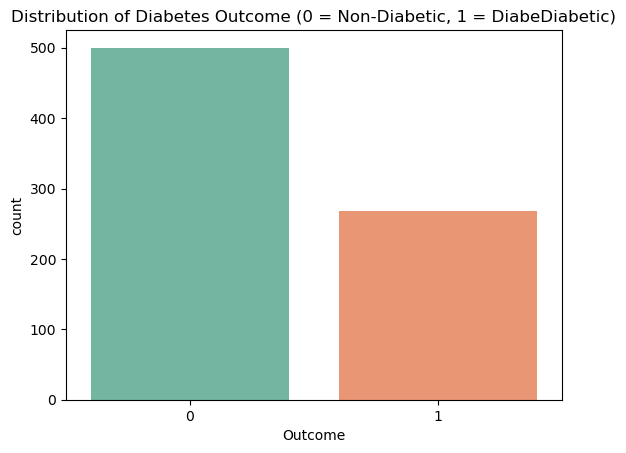

In [9]:
# Outcome Distribution
sns.countplot(x='Outcome',data=df,palette='Set2')
plt.title("Distribution of Diabetes Outcome (0 = Non-Diabetic, 1 = DiabeDiabetic)")
plt.show()

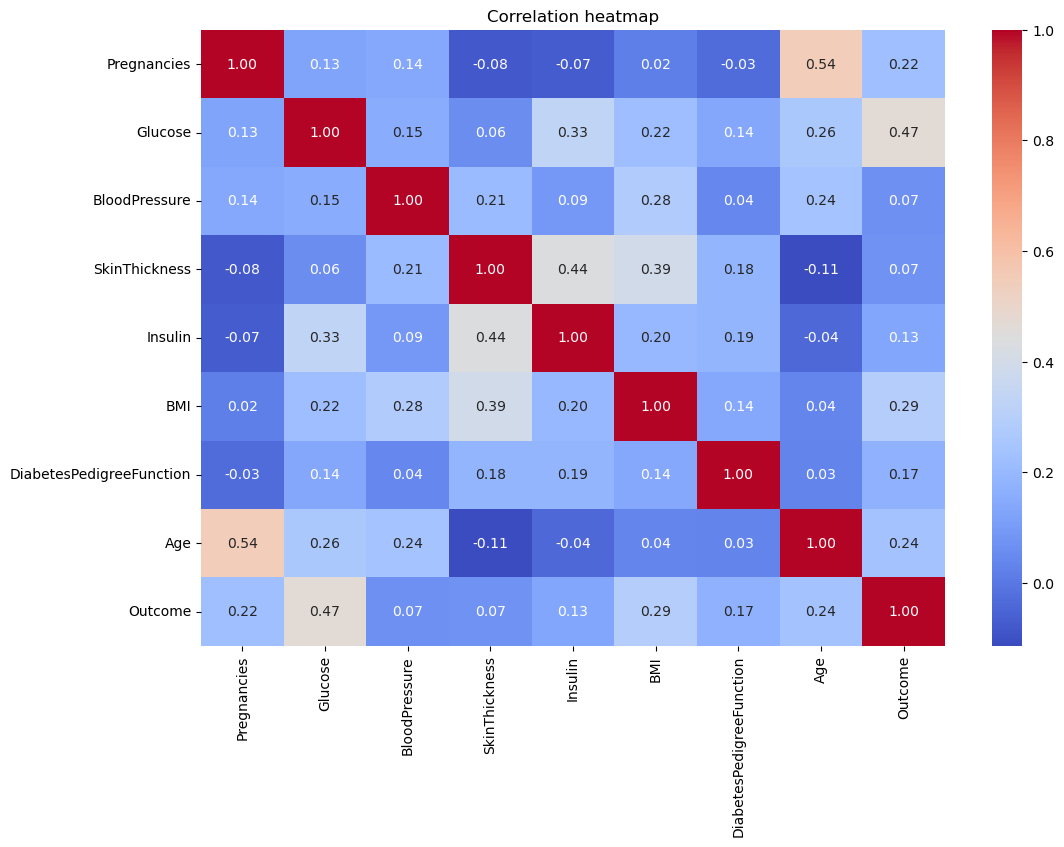

In [10]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation heatmap")
plt.show()

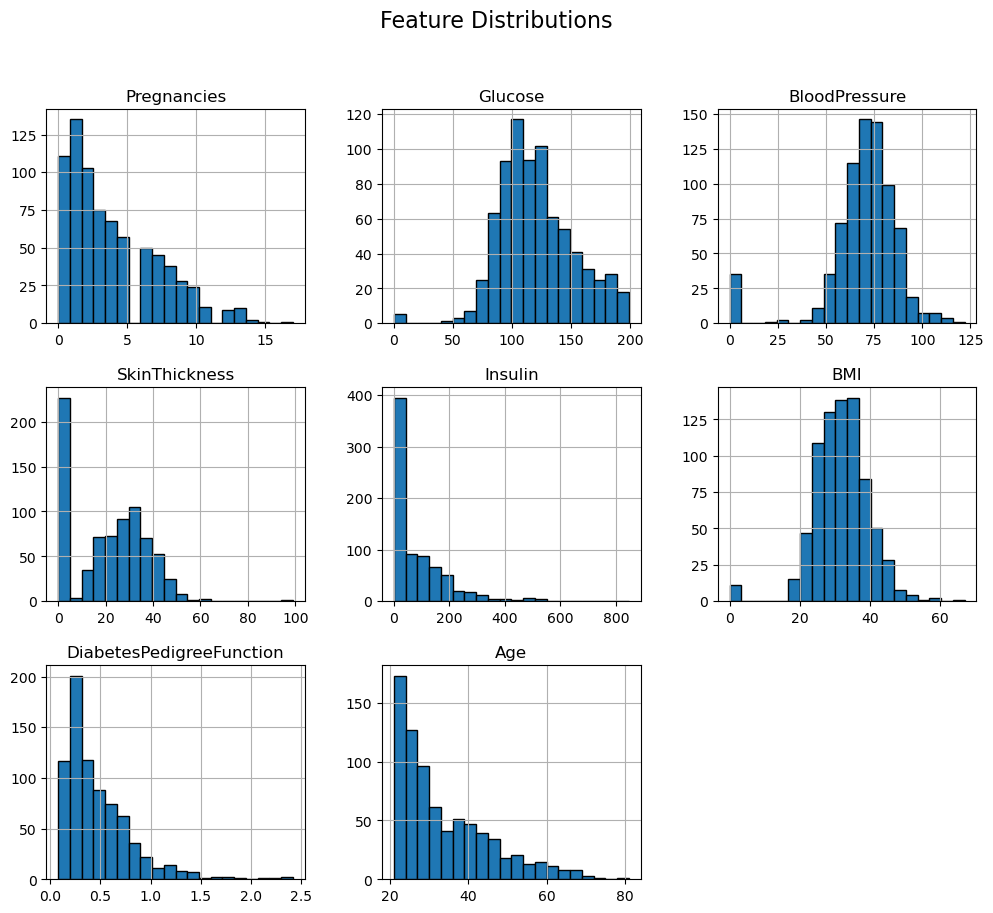

In [11]:
# Histograms of all Features
df.drop("Outcome",axis=1).hist(figsize=(12,10), bins=20,edgecolor='black')
plt.suptitle("Feature Distributions", size=16)
plt.show()

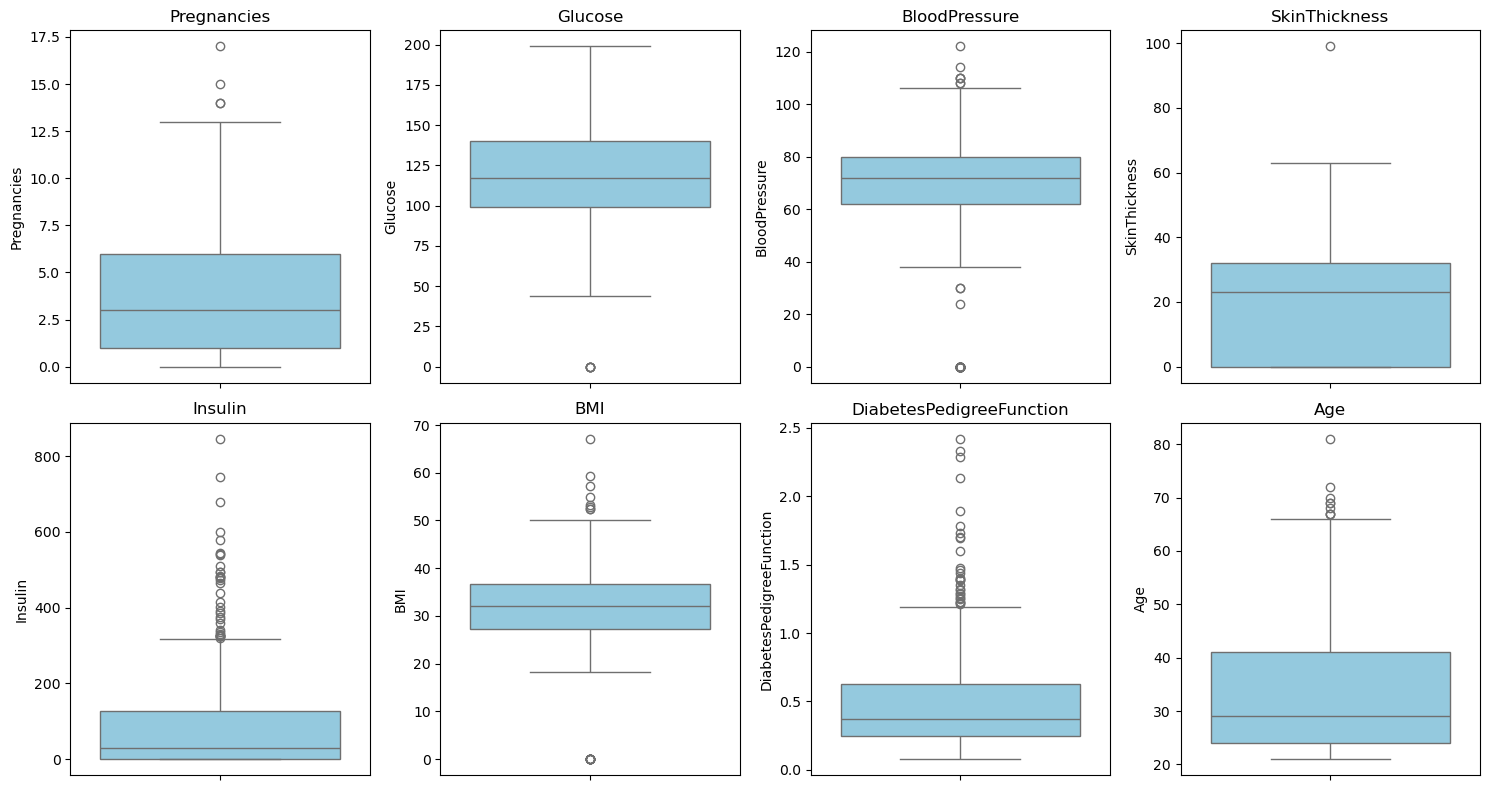

In [12]:
# Boxplots to detect outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(df.columns[:-1], 1):# exclude Outcome
    plt.subplot(2,4,i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

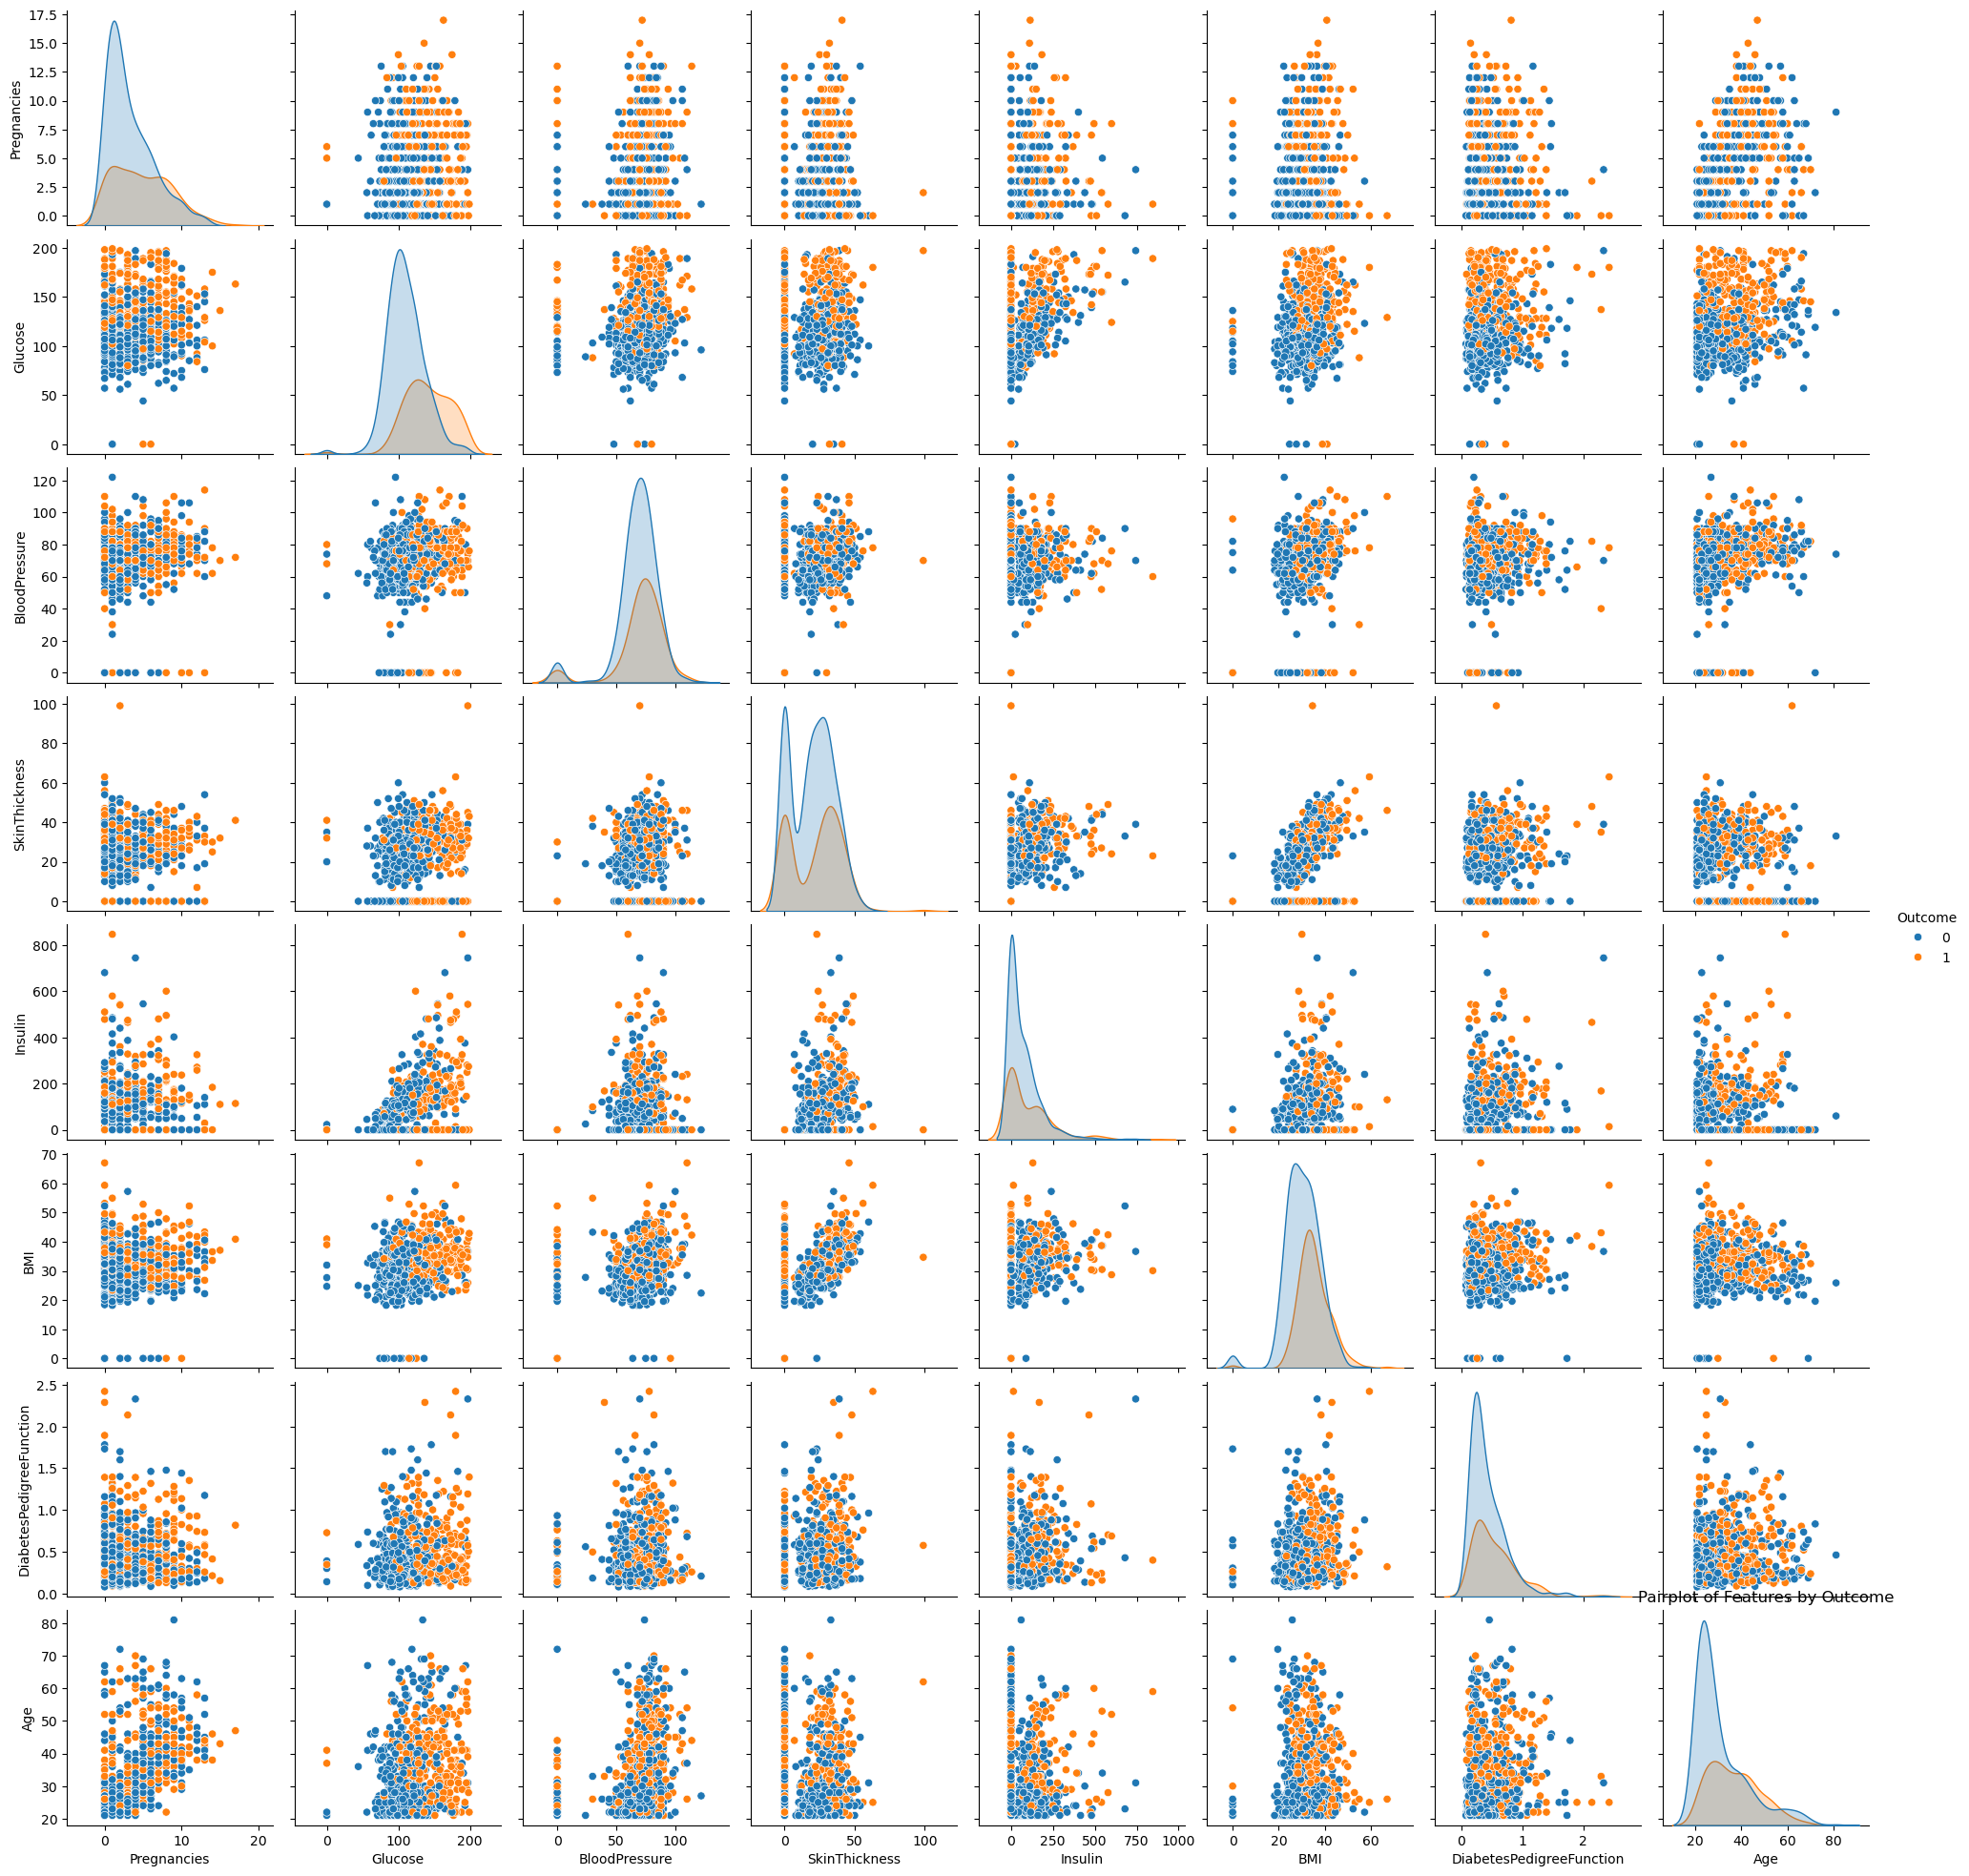

In [13]:
# Pairplot of the dataset
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.title("Pairplot of Features by Outcome")
plt.show()

Text(0.5, 1.0, 'BMI vs Glucose (Colored by Outcome)')

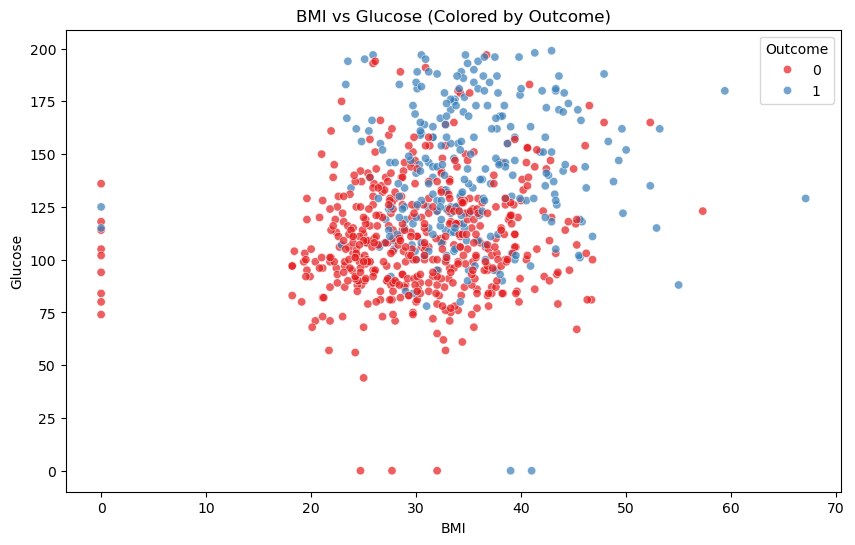

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='BMI',y='Glucose', hue='Outcome',data=df, alpha=0.7, palette='Set1')
plt.title("BMI vs Glucose (Colored by Outcome)")

In [15]:
df.head(20) #Glucose, BloodPressure, SkinThickness,	Insulin and	BMI = include zero values! 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
# Handling zeros 
ZeroCols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin",	"BMI"]
df[ZeroCols] = df[ZeroCols].replace(0,np.nan)

# Filling NaN with median of each column
for col in ZeroCols:
    df[col].fillna(df[col].median(), inplace=True)

In [17]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [18]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)
print("Class distribution in training set:\n", y_train.value_counts())

Training set size: (614, 8)
Testing set size: (154, 8)
Class distribution in training set:
 Outcome
0    401
1    213
Name: count, dtype: int64


In [21]:
# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
# Handle Imbaalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

print("\nClass distribution after SMOTE:\n", y_train_res.value_counts())


Class distribution after SMOTE:
 Outcome
0    401
1    401
Name: count, dtype: int64


In [60]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

===== Logistic Regression =====
Accuracy: 0.7078
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



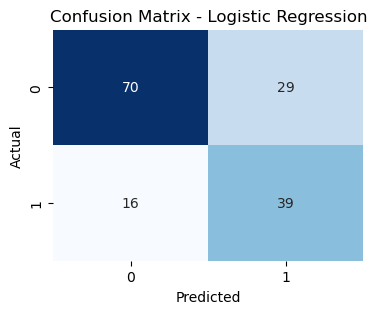

===== Naive Bayes =====
Accuracy: 0.7013
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154



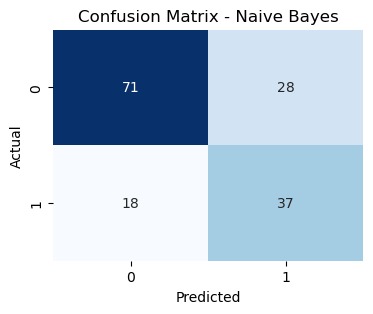

===== KNN =====
Accuracy: 0.6818
              precision    recall  f1-score   support

           0       0.86      0.61      0.71        99
           1       0.54      0.82      0.65        55

    accuracy                           0.68       154
   macro avg       0.70      0.71      0.68       154
weighted avg       0.74      0.68      0.69       154



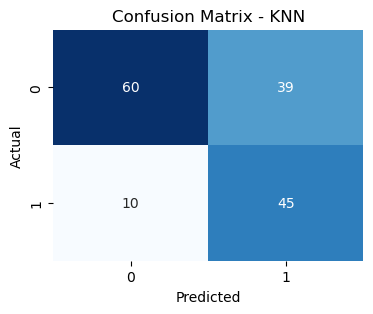

===== Random Forest =====
Accuracy: 0.7857
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        99
           1       0.68      0.76      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



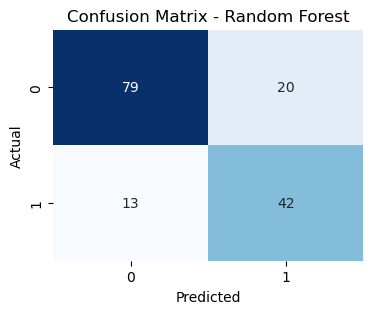

===== Gradient Boosting =====
Accuracy: 0.7338
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.61      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



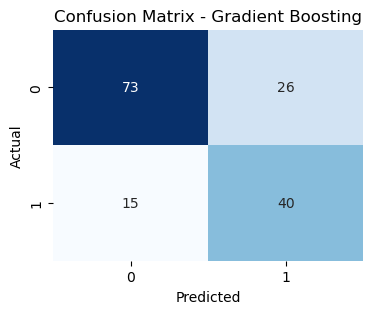

In [64]:
results = {}
# Train & Evaluate models
for name, model in models.items():
    model.fit(x_train_res, y_train_res)   # Train on balanced data
    y_pred = model.predict(x_test_scaled) # Test on original test set
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [68]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy
3        Random Forest  0.785714
4    Gradient Boosting  0.733766
0  Logistic Regression  0.707792
1          Naive Bayes  0.701299
2                  KNN  0.681818


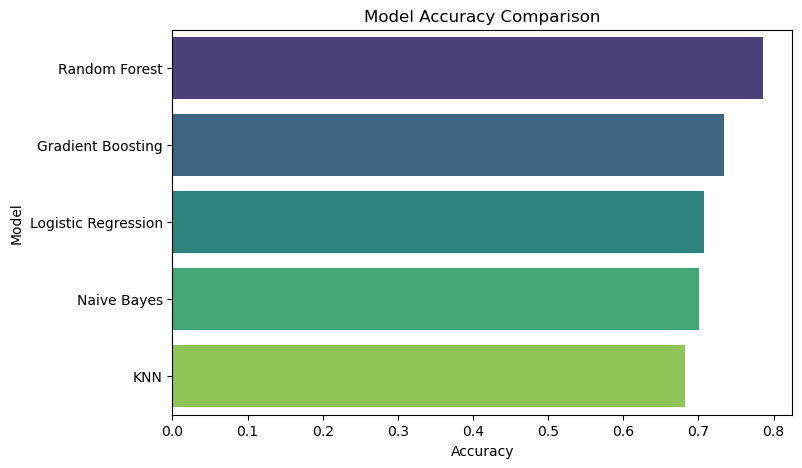

In [70]:
# Barplot of accuracies
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()

In [90]:
from sklearn.model_selection import GridSearchCV
# Define models and parameter grids
models_pGrids = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=500, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7]
        }
    }
}

In [92]:
best_models = {}
for name, mp in param_grids.items():
    print(f"Tuning {name}:")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(x_train_res, y_train_res)
    
    best_models[name] = grid.best_estimator_
    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Best CV Score for {name}: {grid.best_score_:.4f}")
    print("-"*50)

Tuning Logistic Regression:
Best Params for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best CV Score for Logistic Regression: 0.7531
--------------------------------------------------
Tuning Random Forest:
Best Params for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score for Random Forest: 0.8330
--------------------------------------------------
Tuning Gradient Boosting:
Best Params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best CV Score for Gradient Boosting: 0.8231
--------------------------------------------------


In [93]:
results = {}
for name, model in best_models.items():
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Test Accuracy: {acc:.4f}")

Logistic Regression Test Accuracy: 0.7078
Random Forest Test Accuracy: 0.7792
Gradient Boosting Test Accuracy: 0.7143


In [98]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Test Accuracy"])
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)

print("\nFinal Model Comparison:")
print(results_df)


Final Model Comparison:
                 Model  Test Accuracy
1        Random Forest       0.779221
2    Gradient Boosting       0.714286
0  Logistic Regression       0.707792


In [112]:
sample = [[3 , 124 , 80 , 33 , 130 , 33.2 , 0.305 , 26]] 
sample_scaled = scaler.transform(sample)

result = best_model.predict(sample_scaled)
print(result)

[0]


In [114]:
#save the model
import joblib 
joblib.dump(model , 'Diabetes_CB_Model.pkl')

['Diabetes_CB_Model.pkl']